Team 1 Project

## Merging Datasets

In [ ]:
import pandas as pd
import numpy as np
import sklearn
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
#loading datasets
grad18 = pd.read_csv('/content/gdrive/My Drive/CS4774_Project/newgrad18.csv') #gradrate for each school, 2017-2018
test18 = pd.read_csv('/content/gdrive/My Drive/CS4774_Project/newtest19.csv') #unused
food19 = pd.read_csv('/content/gdrive/My Drive/CS4774_Project/fixfixl.csv') #free reduced lunch 2018-2019 -> 2017-2018 dataset is formatted poorly and hard to use ->fixed 2017-2018 to be workable
                                                                              
#acc19 = pd.read_csv('/content/gdrive/My Drive/CS4774_Project/acc19.csv')
#cohort_20 = pd.read_csv('/content/gdrive/My Drive/CS4774_Project/cohort2020.csv')
advclass18 = pd.read_csv('/content/gdrive/My Drive/CS4774_Project/advclass18.csv') #advanced classes 2017-2018
studentcount18 = pd.read_csv('/content/gdrive/My Drive/CS4774_Project/studentcount.csv') #student count 2017-2018
suspensiondays18 = pd.read_csv('/content/gdrive/My Drive/CS4774_Project/fixsusp.csv') #suspension 2017-2018??????

suspensiondays18.info()
food19['School Number'] = food19['School Number'].fillna(0).astype(int)
#food19['FR%'] = food19['FR%'].astype(float)
grad18['School Name'] = grad18['School Name'].str.upper()


#merging datasets
comb = pd.merge(grad18,food19, left_on=['School Number','Division Number'], right_on = ['School Number', 'Division Number'], how='left')

advclass18['School Name'] = advclass18['School Name'].str.upper()
studentcount18['School Name'] = studentcount18['School Name'].str.upper()

comb1 = pd.merge(comb,advclass18, left_on=['School Name_x','Division Name'], right_on = ['School Name', 'Division Name'], how='left')

comb1 = comb1.drop(columns=['School Name_x'])
comb2 = pd.merge(comb1,studentcount18, left_on=['School Name','Division Name'], right_on = ['School Name', 'Division Name'], how='left')

comb2['Governor\'s School Enrollment'] = comb2['Governor\'s School Enrollment'].astype(float, errors = 'raise')
comb2['Governor\'s STEM Academy'] = comb2['Governor\'s STEM Academy'].astype(float, errors = 'raise')
comb2['Governor\'s Health Academy'] = comb2['Governor\'s Health Academy'].astype(float, errors = 'raise')
comb2['Seniors Awarded IB Diplomas'] = comb2['Seniors Awarded IB Diplomas'].astype(float, errors = 'raise')
comb2['Senior IB Enrollment'] = comb2['Senior IB Enrollment'].astype(float, errors = 'raise')
comb2['Students taking 1 or more AP Courses'] = comb2['Students taking 1 or more AP Courses'].astype(float, errors = 'raise')
comb2['Students taking 1 or more AP Exams'] = comb2['Students taking 1 or more AP Exams'].astype(float, errors = 'raise')
comb2['Students taking 1 or more Dual Enrollment Courses 1'] = comb2['Students taking 1 or more Dual Enrollment Courses 1'].astype(float, errors = 'raise')

suspensiondays18['School Name'] = suspensiondays18['School Name'].str.upper()

comb3 = pd.merge(comb2,suspensiondays18, left_on=['School Name','Division Name'], right_on = ['School Name', 'Division Name'], how='left')
comb3.info()
comb3.head(50)
#grad18.info()
#grad18.head(50)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1982 entries, 0 to 1981
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   School Name       1982 non-null   object
 1   TOT_DAYSMISSED_M  1982 non-null   int64 
 2   TOT_DAYSMISSED_F  1982 non-null   int64 
 3   nn                1982 non-null   object
 4   Division Name     1982 non-null   object
dtypes: int64(2), object(3)
memory usage: 77.5+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 332 entries, 0 to 331
Data columns (total 45 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   Cohort Year                                          332 non-null    int64  
 1   Division Number_x                                    332 non-null    int64  
 2   Division Name                                        332 non-null    object 
 3   S

,Cohort Year,Division Number_x,Division Name,School Number_x,Type of Graduation Rate,Rate Type,Graduation Rate,GradRate,GrRa,DN,notnumber,School Name_y,School Type,Low Grade,High Grade,SNP Memb,FREE Elig.,FREE %,RED Elig.,RED %,TOTAL F/R Elig.,TOTAL F/R %,FR,FR%,Division Number_y,School Number_y,School Name,Governor's School Enrollment,Governor's STEM Academy,Governor's Health Academy,Seniors Awarded IB Diplomas,Senior IB Enrollment,Students taking 1 or more AP Courses,Students taking 1 or more AP Exams,Students taking 1 or more Dual Enrollment Courses 1,School Year,Division Number,School Number,Full Time Count (All Grades),Part Time Count (All Grades),Total Count,Student Count,TOT_DAYSMISSED_M,TOT_DAYSMISSED_F,nn
0,2018,1,Accomack County,540,On-Time Graduation Rate,4 yr rate,82.47%,82.47,82.47,1,540,ARCADIA HIGH,High,9,12,657,364,55.40%,56,8.52%,420,63.93%,63.93,63.93,1,540.0,ARCADIA HIGH,0.0,0.0,0.0,0.0,0.0,4.0,4.0,51.0,2017-2018,1.0,540.0,622,,622,622.0,85.0,63.0,ACCOMACK County
1,2018,1,Accomack County,580,On-Time Graduation Rate,4 yr rate,100.00%,100.00,100.00,1,580,CHINCOTEAGUE HIGH,Combined,6,12,292,96,32.88%,9,3.08%,105,35.96%,35.96,35.96,1,580.0,CHINCOTEAGUE HIGH,0.0,0.0,0.0,0.0,0.0,25.0,11.0,2.0,2017-2018,1.0,580.0,286,,286,286.0,5.0,3.0,ACCOMACK County
2,2018,1,Accomack County,70,On-Time Graduation Rate,4 yr rate,85.56%,85.56,85.56,1,70,NANDUA HIGH,High,9,12,783,364,46.49%,39,4.98%,403,51.47%,51.47,51.47,1,70.0,NANDUA HIGH,0.0,0.0,0.0,0.0,0.0,0.0,0.0,143.0,2017-2018,1.0,70.0,739,1,740,740.0,219.0,77.0,ACCOMACK County
3,2018,1,Accomack County,530,On-Time Graduation Rate,4 yr rate,<,<,NaN,1,530,TANGIER COMBINED,Combined,Pre-K,12,62,22,35.48%,2,3.23%,24,38.71%,38.71,38.71,1,530.0,TANGIER COMBINED,0.0,0.0,0.0,0.0,0.0,5.0,4.0,0.0,2017-2018,1.0,530.0,60,,60,60.0,0.0,0.0,ACCOMACK County
4,2018,2,Albemarle County,880,On-Time Graduation Rate,4 yr rate,94.06%,94.06,94.06,2,880,ALBEMARLE HIGH,High,9,12,"1,954",487,24.92%,84,4.30%,571,29.22%,29.22,29.22,2,880.0,ALBEMARLE HIGH,0.0,0.0,0.0,0.0,0.0,610.0,442.0,448.0,2017-2018,2.0,880.0,"1,992",5,"1,997",1997.0,419.0,149.0,ALBEMARLE County
5,2018,2,Albemarle County,1052,On-Time Graduation Rate,4 yr rate,87.46%,87.46,87.46,2,1052,MONTICELLO HIGH,High,9,12,"1,131",330,29.18%,47,4.16%,377,33.33%,33.33,33.33,2,1052.0,MONTICELLO HIGH,0.0,0.0,163.0,0.0,0.0,372.0,283.0,160.0,2017-2018,2.0,1052.0,"1,130",3,"1,133",1133.0,293.0,183.0,ALBEMARLE County
6,2018,2,Albemarle County,890,On-Time Graduation Rate,4 yr rate,72.22%,72.22,72.22,2,890,MURRAY HIGH,High,9,12,99,20,20.20%,4,4.04%,24,24.24%,24.24,24.24,2,890.0,MURRAY HIGH,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2017-2018,2.0,890.0,100,,100,100.0,44.0,58.0,ALBEMARLE County
7,2018,2,Albemarle County,140,On-Time Graduation Rate,4 yr rate,98.25%,98.25,98.25,2,140,WESTERN ALBEMARLE HIGH,High,9,12,"1,135",97,8.55%,30,2.64%,127,11.19%,11.19,11.19,2,140.0,WESTERN ALBEMARLE HIGH,0.0,0.0,0.0,0.0,0.0,502.0,417.0,208.0,2017-2018,2.0,140.0,"1,139",,"1,139",1139.0,123.0,34.0,ALBEMARLE County
8,2018,101,Alexandria City,210,On-Time Graduation Rate,4 yr rate,80.64%,80.64,80.64,101,210,TC WILLIAMS HIGH,High,10,12,"3,014","1,381",45.82%,297,9.85%,"1,678",55.67%,55.67,55.67,101,210.0,T.C. WILLIAMS HIGH,0.0,0.0,0.0,0.0,0.0,976.0,976.0,414.0,2017-2018,101.0,210.0,"3,963",11,"3,974",3974.0,967.0,372.0,ALEXANDRIA City
9,2018,3,Alleghany County,310,On-Time Graduation Rate,4 yr rate,93.63%,93.63,93.63,3,310,ALLEGHANY HIGH,High,9,12,723,241,33.33%,57,7.88%,298,41.22%,41.22,41.22,3,310.0,ALLEGHANY HIGH,25.0,0.0,0.0,0.0,0.0,1.0,0.0,26.0,2017-2018,3.0,310.0,729,,729,729.0,1043.0,105.0,ALLEGHANY County


In [ ]:
suspensiondays18.head(5)

,School Name,TOT_DAYSMISSED_M,TOT_DAYSMISSED_F,nn,Division Name
0,CHINCOTEAGUE ELEMENTARY,23,5,ACCOMACK County,Accomack County
1,CHINCOTEAGUE HIGH,5,3,ACCOMACK County,Accomack County
2,KEGOTANK ELEMENTARY,114,16,ACCOMACK County,Accomack County
3,PUNGOTEAGUE ELEMENTARY,38,6,ACCOMACK County,Accomack County
4,TANGIER COMBINED,0,0,ACCOMACK County,Accomack County


In [ ]:
food19.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2328 entries, 0 to 2327
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   DN               2328 non-null   object 
 1   notnumber        2145 non-null   object 
 2   School Name      2145 non-null   object 
 3   School Type      2145 non-null   object 
 4   Low Grade        2145 non-null   object 
 5   High Grade       2145 non-null   object 
 6   SNP Memb         2143 non-null   object 
 7   FREE Elig.       2143 non-null   object 
 8   FREE %           2143 non-null   object 
 9   RED Elig.        2143 non-null   object 
 10  RED %            2143 non-null   object 
 11  TOTAL F/R Elig.  2143 non-null   object 
 12  TOTAL F/R %      2143 non-null   object 
 13  School Number    2328 non-null   int64  
 14  Division Number  1988 non-null   float64
 15  FR               2143 non-null   object 
 16  FR%              2324 non-null   float64
dtypes: float64(2),

# Data Cleansing and Feature Engineering

Dropping Columns:


In [ ]:
#dropping unneccessary columns
schooldata = comb3.drop(columns=['Cohort Year', 'Division Name','Type of Graduation Rate', 'School Name', 'School Number_x','Cohort Year','Rate Type','Graduation Rate','GradRate','DN','notnumber','School Type','Low Grade','High Grade','SNP Memb'])
schooldata = schooldata.drop(columns=['School Name_y','FREE Elig.','FREE %','RED Elig.','RED %','TOTAL F/R Elig.','TOTAL F/R %'])
schooldata = schooldata.drop(columns=['FR','Division Number_y','School Number_y','School Year','Division Number','Full Time Count (All Grades)','Part Time Count (All Grades)','Total Count','nn'])
schooldata = schooldata.drop(columns=['School Number'])
schooldata = schooldata.drop(columns=['Division Number_x'])

In [ ]:
schooldata.info()
schooldata.head(50)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 332 entries, 0 to 331
Data columns (total 13 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   GrRa                                                 324 non-null    float64
 1   FR%                                                  329 non-null    float64
 2   Governor's School Enrollment                         330 non-null    float64
 3   Governor's STEM Academy                              330 non-null    float64
 4   Governor's Health Academy                            330 non-null    float64
 5   Seniors Awarded IB Diplomas                          330 non-null    float64
 6   Senior IB Enrollment                                 330 non-null    float64
 7   Students taking 1 or more AP Courses                 330 non-null    float64
 8   Students taking 1 or more AP Exams                   330 non-null    f

,GrRa,FR%,Governor's School Enrollment,Governor's STEM Academy,Governor's Health Academy,Seniors Awarded IB Diplomas,Senior IB Enrollment,Students taking 1 or more AP Courses,Students taking 1 or more AP Exams,Students taking 1 or more Dual Enrollment Courses 1,Student Count,TOT_DAYSMISSED_M,TOT_DAYSMISSED_F
0,82.47,63.93,0.0,0.0,0.0,0.0,0.0,4.0,4.0,51.0,622.0,85.0,63.0
1,100.00,35.96,0.0,0.0,0.0,0.0,0.0,25.0,11.0,2.0,286.0,5.0,3.0
2,85.56,51.47,0.0,0.0,0.0,0.0,0.0,0.0,0.0,143.0,740.0,219.0,77.0
3,NaN,38.71,0.0,0.0,0.0,0.0,0.0,5.0,4.0,0.0,60.0,0.0,0.0
4,94.06,29.22,0.0,0.0,0.0,0.0,0.0,610.0,442.0,448.0,1997.0,419.0,149.0
5,87.46,33.33,0.0,0.0,163.0,0.0,0.0,372.0,283.0,160.0,1133.0,293.0,183.0
6,72.22,24.24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,44.0,58.0
7,98.25,11.19,0.0,0.0,0.0,0.0,0.0,502.0,417.0,208.0,1139.0,123.0,34.0
8,80.64,55.67,0.0,0.0,0.0,0.0,0.0,976.0,976.0,414.0,3974.0,967.0,372.0
9,93.63,41.22,25.0,0.0,0.0,0.0,0.0,1.0,0.0,26.0,729.0,1043.0,105.0


Renaming Columns

In [ ]:
#Rename columns to be more readable

schooldata = schooldata.rename(columns={'FR%':'Free/Reduced Lunch %', 'GrRa':'4 Year Graduation Rate'})
#schooldata.info()
schooldata.describe()

,4 Year Graduation Rate,Free/Reduced Lunch %,Governor's School Enrollment,Governor's STEM Academy,Governor's Health Academy,Seniors Awarded IB Diplomas,Senior IB Enrollment,Students taking 1 or more AP Courses,Students taking 1 or more AP Exams,Students taking 1 or more Dual Enrollment Courses 1,Student Count,TOT_DAYSMISSED_M,TOT_DAYSMISSED_F
count,324.00000,329.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,327.000000,319.000000,319.000000
mean,91.14071,43.744377,18.730303,9.496970,3.796970,3.303030,5.190909,264.066667,194.615152,102.621212,1210.926606,474.351097,224.545455
std,9.80770,23.465268,100.737840,34.920948,28.294339,14.006913,19.297776,294.691021,271.809070,102.755673,749.957754,620.995966,393.696660
min,3.19000,1.850000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34.000000,0.000000,0.000000
25%,89.56750,28.030000,0.000000,0.000000,0.000000,0.000000,0.000000,25.250000,2.000000,24.000000,559.000000,109.500000,33.000000
50%,93.21500,42.080000,6.000000,0.000000,0.000000,0.000000,0.000000,155.000000,71.500000,78.000000,1135.000000,242.000000,94.000000
75%,95.46500,56.660000,19.000000,0.000000,0.000000,0.000000,0.000000,421.500000,273.500000,145.000000,1763.500000,528.000000,215.500000
max,100.00000,100.000000,1805.000000,316.000000,296.000000,112.000000,151.000000,1469.000000,1452.000000,489.000000,4300.000000,3483.000000,3914.000000


In [ ]:
schooldata.corr()

,4 Year Graduation Rate,Free/Reduced Lunch %,Governor's School Enrollment,Governor's STEM Academy,Governor's Health Academy,Seniors Awarded IB Diplomas,Senior IB Enrollment,Students taking 1 or more AP Courses,Students taking 1 or more AP Exams,Students taking 1 or more Dual Enrollment Courses 1,Student Count,TOT_DAYSMISSED_M,TOT_DAYSMISSED_F
4 Year Graduation Rate,1.000000,-0.384786,0.063664,0.013693,0.020743,0.033059,0.049583,0.243914,0.208914,0.165877,0.108891,-0.104200,-0.103385
Free/Reduced Lunch %,-0.384786,1.000000,-0.101744,-0.001687,-0.061639,-0.083197,-0.086194,-0.544932,-0.494456,-0.270654,-0.400747,0.176600,0.223801
Governor's School Enrollment,0.063664,-0.101744,1.000000,-0.015826,0.000063,-0.030459,-0.028978,0.193902,0.221819,-0.037515,0.060574,0.255373,0.225747
Governor's STEM Academy,0.013693,-0.001687,-0.015826,1.000000,-0.035696,0.004476,-0.016388,0.090028,0.051701,0.008040,0.113395,0.179922,0.197221
Governor's Health Academy,0.020743,-0.061639,0.000063,-0.035696,1.000000,-0.008871,-0.019607,0.085208,0.074239,0.091741,0.081037,0.183989,0.162986
Seniors Awarded IB Diplomas,0.033059,-0.083197,-0.030459,0.004476,-0.008871,1.000000,0.910631,0.060446,0.081707,-0.112410,0.294250,-0.021381,-0.033345
Senior IB Enrollment,0.049583,-0.086194,-0.028978,-0.016388,-0.019607,0.910631,1.000000,0.050315,0.053966,-0.139510,0.271619,0.011515,0.006485
Students taking 1 or more AP Courses,0.243914,-0.544932,0.193902,0.090028,0.085208,0.060446,0.050315,1.000000,0.915141,0.216485,0.776637,0.016428,-0.013131
Students taking 1 or more AP Exams,0.208914,-0.494456,0.221819,0.051701,0.074239,0.081707,0.053966,0.915141,1.000000,0.207412,0.691103,-0.072431,-0.082646
Students taking 1 or more Dual Enrollment Courses 1,0.165877,-0.270654,-0.037515,0.008040,0.091741,-0.112410,-0.139510,0.216485,0.207412,1.000000,0.227624,-0.015736,-0.052400


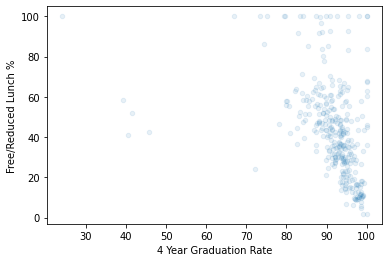

In [ ]:
schooldata.plot(kind="scatter", x="4 Year Graduation Rate", y="Free/Reduced Lunch %",
             alpha=0.1)

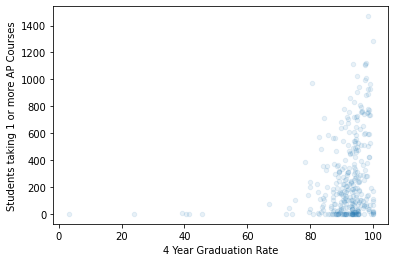

In [ ]:
schooldata.plot(kind="scatter", x="4 Year Graduation Rate", y="Students taking 1 or more AP Courses",
             alpha=0.1)

Feature Engineering

In [ ]:
schooldata['Total Days Missed'] = schooldata['TOT_DAYSMISSED_M'] + schooldata['TOT_DAYSMISSED_F']

# normalize data --> percentages rather than total counts of students
schooldata['GovEnrPerStu'] = schooldata['Governor\'s School Enrollment'] / schooldata['Student Count']
schooldata['GovStemPerStu'] = schooldata['Governor\'s STEM Academy'] / schooldata['Student Count']
schooldata['GovHeaPerStu'] = schooldata['Governor\'s Health Academy'] / schooldata['Student Count']
schooldata['IBDipPerStu'] = schooldata['Seniors Awarded IB Diplomas'] / schooldata['Student Count']
schooldata['IBEnrPerStu'] = schooldata['Senior IB Enrollment'] / schooldata['Student Count']
schooldata['APEnrPerStu'] = schooldata['Students taking 1 or more AP Courses'] / schooldata['Student Count']
schooldata['APExPerStu'] = schooldata['Students taking 1 or more AP Exams'] / schooldata['Student Count']
schooldata['APEnrPerStu'] = schooldata['Students taking 1 or more Dual Enrollment Courses 1'] / schooldata['Student Count']
schooldata['TotalDaysMissedPerStu'] = schooldata['Total Days Missed'] / schooldata['Student Count']
schooldata['MDaysMissedPerStu'] = schooldata['TOT_DAYSMISSED_M'] / schooldata['Student Count']
schooldata['FDaysMissedPerStu'] = schooldata['TOT_DAYSMISSED_F'] / schooldata['Student Count']
schooldata.corr()

,4 Year Graduation Rate,Free/Reduced Lunch %,Governor's School Enrollment,Governor's STEM Academy,Governor's Health Academy,Seniors Awarded IB Diplomas,Senior IB Enrollment,Students taking 1 or more AP Courses,Students taking 1 or more AP Exams,Students taking 1 or more Dual Enrollment Courses 1,Student Count,TOT_DAYSMISSED_M,TOT_DAYSMISSED_F,Total Days Missed,GovEnrPerStu,GovStemPerStu,GovHeaPerStu,IBDipPerStu,IBEnrPerStu,APEnrPerStu,APExPerStu,TotalDaysMissedPerStu,MDaysMissedPerStu,FDaysMissedPerStu
4 Year Graduation Rate,1.000000,-0.384786,0.063664,0.013693,0.020743,0.033059,0.049583,0.243914,0.208914,0.165877,0.108891,-0.104200,-0.103385,-0.108357,0.068458,0.008757,0.010755,0.035814,0.067344,0.026790,0.257149,-0.167456,-0.152500,-0.170833
Free/Reduced Lunch %,-0.384786,1.000000,-0.101744,-0.001687,-0.061639,-0.083197,-0.086194,-0.544932,-0.494456,-0.270654,-0.400747,0.176600,0.223801,0.203298,-0.050269,0.085700,-0.058046,-0.077706,-0.046865,-0.018369,-0.502629,0.365745,0.356377,0.339491
Governor's School Enrollment,0.063664,-0.101744,1.000000,-0.015826,0.000063,-0.030459,-0.028978,0.193902,0.221819,-0.037515,0.060574,0.255373,0.225747,0.254316,0.978020,-0.019597,-0.004847,-0.031320,-0.020942,-0.066583,0.264706,0.179295,0.173653,0.168013
Governor's STEM Academy,0.013693,-0.001687,-0.015826,1.000000,-0.035696,0.004476,-0.016388,0.090028,0.051701,0.008040,0.113395,0.179922,0.197221,0.194622,-0.028389,0.884189,-0.037949,-0.001682,-0.024251,-0.066468,0.060933,0.127719,0.109227,0.140677
Governor's Health Academy,0.020743,-0.061639,0.000063,-0.035696,1.000000,-0.008871,-0.019607,0.085208,0.074239,0.091741,0.081037,0.183989,0.162986,0.183365,-0.014676,-0.039846,0.970964,-0.004365,-0.017242,-0.013487,0.088052,0.103413,0.106296,0.088001
Seniors Awarded IB Diplomas,0.033059,-0.083197,-0.030459,0.004476,-0.008871,1.000000,0.910631,0.060446,0.081707,-0.112410,0.294250,-0.021381,-0.033345,-0.027137,-0.052367,-0.026776,-0.009372,0.937131,0.559823,-0.177699,0.034954,-0.097983,-0.102644,-0.080582
Senior IB Enrollment,0.049583,-0.086194,-0.028978,-0.016388,-0.019607,0.910631,1.000000,0.050315,0.053966,-0.139510,0.271619,0.011515,0.006485,0.009973,-0.045800,-0.041717,-0.020696,0.860702,0.766099,-0.203909,0.017670,-0.068068,-0.076597,-0.048303
Students taking 1 or more AP Courses,0.243914,-0.544932,0.193902,0.090028,0.085208,0.060446,0.050315,1.000000,0.915141,0.216485,0.776637,0.016428,-0.013131,0.005171,0.119882,-0.002577,0.075885,0.049947,0.017851,-0.248454,0.831751,-0.219375,-0.238288,-0.168119
Students taking 1 or more AP Exams,0.208914,-0.494456,0.221819,0.051701,0.074239,0.081707,0.053966,0.915141,1.000000,0.207412,0.691103,-0.072431,-0.082646,-0.079664,0.158930,-0.018932,0.062885,0.061438,0.001655,-0.199424,0.907951,-0.247703,-0.266543,-0.193478
Students taking 1 or more Dual Enrollment Courses 1,0.165877,-0.270654,-0.037515,0.008040,0.091741,-0.112410,-0.139510,0.216485,0.207412,1.000000,0.227624,-0.015736,-0.052400,-0.031244,-0.063233,-0.019094,0.061328,-0.122070,-0.136698,0.619964,0.203800,-0.138795,-0.134913,-0.129355


In [ ]:
schooldata.describe()

,4 Year Graduation Rate,Free/Reduced Lunch %,Governor's School Enrollment,Governor's STEM Academy,Governor's Health Academy,Seniors Awarded IB Diplomas,Senior IB Enrollment,Students taking 1 or more AP Courses,Students taking 1 or more AP Exams,Students taking 1 or more Dual Enrollment Courses 1,Student Count,TOT_DAYSMISSED_M,TOT_DAYSMISSED_F,Total Days Missed,GovEnrPerStu,GovStemPerStu,GovHeaPerStu,IBDipPerStu,IBEnrPerStu,APEnrPerStu,APExPerStu,TotalDaysMissedPerStu,MDaysMissedPerStu,FDaysMissedPerStu
count,324.00000,329.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,327.000000,319.000000,319.000000,319.000000,327.000000,327.000000,327.000000,327.000000,327.000000,327.000000,327.000000,316.000000,316.000000,316.000000
mean,91.14071,43.744377,18.730303,9.496970,3.796970,3.303030,5.190909,264.066667,194.615152,102.621212,1210.926606,474.351097,224.545455,698.896552,0.016334,0.008012,0.002477,0.001779,0.003420,0.105946,0.121031,0.632319,0.429524,0.202795
std,9.80770,23.465268,100.737840,34.920948,28.294339,14.006913,19.297776,294.691021,271.809070,102.755673,749.957754,620.995966,393.696660,973.048283,0.058691,0.026826,0.017578,0.007044,0.014653,0.103363,0.129398,0.773085,0.478841,0.330084
min,3.19000,1.850000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,89.56750,28.030000,0.000000,0.000000,0.000000,0.000000,0.000000,25.250000,2.000000,24.000000,559.000000,109.500000,33.000000,147.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.022916,0.006100,0.143488,0.106804,0.033179
50%,93.21500,42.080000,6.000000,0.000000,0.000000,0.000000,0.000000,155.000000,71.500000,78.000000,1135.000000,242.000000,94.000000,320.000000,0.005848,0.000000,0.000000,0.000000,0.000000,0.081035,0.078431,0.389762,0.264540,0.096767
75%,95.46500,56.660000,19.000000,0.000000,0.000000,0.000000,0.000000,421.500000,273.500000,145.000000,1763.500000,528.000000,215.500000,786.500000,0.017900,0.000000,0.000000,0.000000,0.000000,0.171036,0.192700,0.855975,0.547164,0.236564
max,100.00000,100.000000,1805.000000,316.000000,296.000000,112.000000,151.000000,1469.000000,1452.000000,489.000000,4300.000000,3483.000000,3914.000000,6723.000000,1.010638,0.252396,0.147997,0.060589,0.193452,0.892857,0.744681,5.820430,3.319355,3.308538


In [ ]:
schooldata.columns

Index(['4 Year Graduation Rate', 'Free/Reduced Lunch %',
       'Governor's School Enrollment', 'Governor's STEM Academy',
       'Governor's Health Academy', 'Seniors Awarded IB Diplomas',
       'Senior IB Enrollment', 'Students taking 1 or more AP Courses',
       'Students taking 1 or more AP Exams',
       'Students taking 1 or more Dual Enrollment Courses 1', 'Student Count',
       'TOT_DAYSMISSED_M', 'TOT_DAYSMISSED_F', 'Total Days Missed',
       'GovEnrPerStu', 'GovStemPerStu', 'GovHeaPerStu', 'IBDipPerStu',
       'IBEnrPerStu', 'APEnrPerStu', 'APExPerStu', 'TotalDaysMissedPerStu',
       'MDaysMissedPerStu', 'FDaysMissedPerStu'],
      dtype='object')

Data Cleaning

In [ ]:
schooldata=schooldata.dropna()
sample_incomplete_rows = schooldata[schooldata.isnull().any(axis=1)].head()
sample_incomplete_rows

,4 Year Graduation Rate,Free/Reduced Lunch %,Governor's School Enrollment,Governor's STEM Academy,Governor's Health Academy,Seniors Awarded IB Diplomas,Senior IB Enrollment,Students taking 1 or more AP Courses,Students taking 1 or more AP Exams,Students taking 1 or more Dual Enrollment Courses 1,Student Count,TOT_DAYSMISSED_M,TOT_DAYSMISSED_F,Total Days Missed,GovEnrPerStu,GovStemPerStu,GovHeaPerStu,IBDipPerStu,IBEnrPerStu,APEnrPerStu,APExPerStu,TotalDaysMissedPerStu,MDaysMissedPerStu,FDaysMissedPerStu


In [ ]:
from sklearn.model_selection import train_test_split
#splitting data, 80/20
train_set, test_set = train_test_split(schooldata, test_size=0.2, random_state=42)

In [ ]:
#seperating training data and training labels
schooldata = train_set.copy()
schooldata = schooldata.drop("4 Year Graduation Rate", axis=1) # drop labels for training set
schooldata_labels = train_set["4 Year Graduation Rate"].copy()

Pipeline

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer, make_column_selector


num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])
full_pipeline = ColumnTransformer([
        ("num", num_pipeline, make_column_selector(dtype_include=np.number)),                         
        ("cat", OneHotEncoder(), make_column_selector(dtype_include=object))
    ])

schooldata_prepared = full_pipeline.fit_transform(schooldata)
schooldata_prepared

array([[-0.94411179, -0.08332247, -0.31059438, ...,  0.52895074,
        -0.01377499,  1.23101009],
       [-0.30214863, -0.65237269, -0.31059438, ...,  0.00599109,
         0.21183066, -0.28587069],
       [ 0.1248154 , -0.65237269, -0.31059438, ..., -0.66756923,
        -0.6858906 , -0.55896729],
       ...,
       [-0.87172297, -0.65237269, -0.31059438, ..., -0.50261839,
        -0.44725868, -0.51865587],
       [-0.7412497 ,  0.58056946,  2.55291257, ..., -0.57071637,
        -0.617352  , -0.43406635],
       [-0.01649452, -0.65237269, -0.31059438, ..., -0.42309832,
        -0.41785181, -0.37811045]])

# Train Models

We decided to start with three regression models. Those models are a linear regressor, a decision tree regressor, and a random forest regressor. 

In [ ]:
from sklearn.linear_model import LinearRegression

#create linear regression model
lin_reg = LinearRegression()
lin_reg.fit(schooldata_prepared, schooldata_labels)

LinearRegression()

In [ ]:
from sklearn.metrics import mean_squared_error

#linear regression preformance
schooldata_predictions = lin_reg.predict(schooldata_prepared)
lin_mse = mean_squared_error(schooldata_labels, schooldata_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

5.766073045359893

In [ ]:
from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(schooldata_labels, schooldata_predictions)
lin_mae

3.580215006736597

In [ ]:
from sklearn.tree import DecisionTreeRegressor

#create decision tree model
tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(schooldata_prepared, schooldata_labels)

DecisionTreeRegressor(random_state=42)

In [ ]:
from sklearn.model_selection import cross_val_score

#decision tree performance scores
scores = cross_val_score(tree_reg, schooldata_prepared, schooldata_labels,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)
tree_rmse_scores

array([ 6.91353426,  5.60207105,  6.04771362,  5.20302643, 11.50205286,
        4.02834557,  6.51574892,  3.87905272, 10.06675593,  4.30688499])

In [ ]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

Scores: [ 6.91353426  5.60207105  6.04771362  5.20302643 11.50205286  4.02834557
  6.51574892  3.87905272 10.06675593  4.30688499]
Mean: 6.406518634356759
Standard deviation: 2.414690978359954


In [ ]:
lin_scores = cross_val_score(lin_reg, schooldata_prepared, schooldata_labels,
                             scoring="neg_mean_squared_error", cv=5)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [ 5.05911812  4.93904883 14.15827098  5.11652719  8.80811659]
Mean: 7.616216339865415
Standard deviation: 3.582555740410537


In [ ]:
from sklearn.ensemble import RandomForestRegressor

#create random forest model
forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(schooldata_prepared, schooldata_labels)

RandomForestRegressor(random_state=42)

In [ ]:
#random forest performance scores
schooldata_predictions = forest_reg.predict(schooldata_prepared)
forest_mse = mean_squared_error(schooldata_labels, schooldata_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

2.4580314678381594

In [ ]:
from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_reg, schooldata_prepared, schooldata_labels,
                                scoring="neg_mean_squared_error", cv=5)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [4.50018694 5.3085807  8.59796567 4.24003137 7.94847487]
Mean: 6.119047908324222
Standard deviation: 1.805552952647295


# Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

#performing grid seach on decision tree
grid_tree_reg = DecisionTreeRegressor(random_state=42)

tree_parameter_grid = [{'splitter': ['best', 'random'], 'max_features':[2, 4, 6, 8, 10, 12]}]
tree_grid_search = GridSearchCV(grid_tree_reg, tree_parameter_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
tree_grid_search.fit(schooldata_prepared, schooldata_labels)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=42),
             param_grid=[{'max_features': [2, 4, 6, 8, 10, 12],
                          'splitter': ['best', 'random']}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [ ]:
tree_grid_search.best_estimator_

DecisionTreeRegressor(max_features=8, random_state=42)

In [ ]:
#performing grid seach on random forest
grid_forest_reg = RandomForestRegressor(random_state=42)

forest_parameter_grid = [{'n_estimators':[10, 25, 50, 100], 'max_features':[2, 4, 6, 8, 10, 12]}]
forest_grid_search = GridSearchCV(grid_forest_reg, forest_parameter_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
forest_grid_search.fit(schooldata_prepared, schooldata_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [2, 4, 6, 8, 10, 12],
                          'n_estimators': [10, 25, 50, 100]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [ ]:
forest_grid_search.best_estimator_

RandomForestRegressor(max_features=12, random_state=42)

In [ ]:
grid_forest_reg = RandomForestRegressor(random_state=42)

forest_parameter_grid = [{'n_estimators':[5, 10, 15, 20], 'max_features':[8, 14, 16, 18, 20]}]
forest_grid_search = GridSearchCV(grid_forest_reg, forest_parameter_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
forest_grid_search.fit(schooldata_prepared, schooldata_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [8, 14, 16, 18, 20],
                          'n_estimators': [5, 10, 15, 20]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [ ]:
forest_grid_search.best_estimator_

RandomForestRegressor(max_features=18, n_estimators=20, random_state=42)

# Regression Model Test Scores

From the test scores below we can see that the random forest model (with the best hyperparameters as determined by the grid search) has the lowest RMSE. 

In [ ]:
school_test_data = test_set.copy()
school_test_data = test_set.drop("4 Year Graduation Rate", axis=1) # drop labels for training set
school_test_labels = test_set["4 Year Graduation Rate"].copy()

school_test_prep = full_pipeline.transform(school_test_data)

In [ ]:
#final rmse value for linear regressor
lin_test_pred = lin_reg.predict(school_test_prep)

lin_test_mse = mean_squared_error(school_test_labels, lin_test_pred)
lin_test_rmse = np.sqrt(lin_test_mse)
print(lin_test_rmse)

4.78017537721665


In [ ]:
print(schooldata.columns)

Index(['Free/Reduced Lunch %', 'Governor's School Enrollment',
       'Governor's STEM Academy', 'Governor's Health Academy',
       'Seniors Awarded IB Diplomas', 'Senior IB Enrollment',
       'Students taking 1 or more AP Courses',
       'Students taking 1 or more AP Exams',
       'Students taking 1 or more Dual Enrollment Courses 1', 'Student Count',
       'TOT_DAYSMISSED_M', 'TOT_DAYSMISSED_F', 'Total Days Missed',
       'GovEnrPerStu', 'GovStemPerStu', 'GovHeaPerStu', 'IBDipPerStu',
       'IBEnrPerStu', 'APEnrPerStu', 'APExPerStu', 'TotalDaysMissedPerStu',
       'MDaysMissedPerStu', 'FDaysMissedPerStu'],
      dtype='object')


In [ ]:
importance = lin_reg.coef_
# summarize feature importance
count = 0

for i,v in enumerate(importance):
  print(schooldata.columns[count])
  print('Feature: ''%0d, Score: %.5f' % (i,v))
  count+=1

 

Free/Reduced Lunch %
Feature: 0, Score: -2.13222
Governor's School Enrollment
Feature: 1, Score: -1.95466
Governor's STEM Academy
Feature: 2, Score: -1.45263
Governor's Health Academy
Feature: 3, Score: 0.26990
Seniors Awarded IB Diplomas
Feature: 4, Score: 3.09241
Senior IB Enrollment
Feature: 5, Score: 0.10483
Students taking 1 or more AP Courses
Feature: 6, Score: 2.91942
Students taking 1 or more AP Exams
Feature: 7, Score: 0.40932
Students taking 1 or more Dual Enrollment Courses 1
Feature: 8, Score: 2.80669
Student Count
Feature: 9, Score: -3.95656
TOT_DAYSMISSED_M
Feature: 10, Score: -3.30208
TOT_DAYSMISSED_F
Feature: 11, Score: 6.73420
Total Days Missed
Feature: 12, Score: 0.78766
GovEnrPerStu
Feature: 13, Score: 2.39543
GovStemPerStu
Feature: 14, Score: 1.35576
GovHeaPerStu
Feature: 15, Score: -0.62114
IBDipPerStu
Feature: 16, Score: -2.72928
IBEnrPerStu
Feature: 17, Score: 0.43119
APEnrPerStu
Feature: 18, Score: -3.38444
APExPerStu
Feature: 19, Score: -1.21595
TotalDaysMissed

In [ ]:
#final rmse value for decision tree 
tree_test_pred = tree_grid_search.best_estimator_.predict(school_test_prep)

tree_test_mse = mean_squared_error(school_test_labels, tree_test_pred)
tree_test_rmse = np.sqrt(tree_test_mse)
print(tree_test_rmse)

6.8119080979916244


In [ ]:
importance = tree_reg.feature_importances_
# summarize feature importance
count = 0

for i,v in enumerate(importance):
  print(schooldata.columns[count])
  print('Feature: ''%0d, Score: %.5f' % (i,v))
  count+=1

Free/Reduced Lunch %
Feature: 0, Score: 0.21711
Governor's School Enrollment
Feature: 1, Score: 0.01922
Governor's STEM Academy
Feature: 2, Score: 0.00161
Governor's Health Academy
Feature: 3, Score: 0.00000
Seniors Awarded IB Diplomas
Feature: 4, Score: 0.00105
Senior IB Enrollment
Feature: 5, Score: 0.00000
Students taking 1 or more AP Courses
Feature: 6, Score: 0.01656
Students taking 1 or more AP Exams
Feature: 7, Score: 0.00904
Students taking 1 or more Dual Enrollment Courses 1
Feature: 8, Score: 0.01384
Student Count
Feature: 9, Score: 0.14119
TOT_DAYSMISSED_M
Feature: 10, Score: 0.00522
TOT_DAYSMISSED_F
Feature: 11, Score: 0.09520
Total Days Missed
Feature: 12, Score: 0.05457
GovEnrPerStu
Feature: 13, Score: 0.01676
GovStemPerStu
Feature: 14, Score: 0.00237
GovHeaPerStu
Feature: 15, Score: 0.00000
IBDipPerStu
Feature: 16, Score: 0.00178
IBEnrPerStu
Feature: 17, Score: 0.00000
APEnrPerStu
Feature: 18, Score: 0.25617
APExPerStu
Feature: 19, Score: 0.00746
TotalDaysMissedPerStu
Fe

In [ ]:
#final rmse value for random forest
forest_test_pred = forest_grid_search.best_estimator_.predict(school_test_prep)

forest_test_mse = mean_squared_error(school_test_labels, forest_test_pred)
forest_test_rmse = np.sqrt(forest_test_mse)
print(forest_test_rmse)

3.9451573581601522


In [ ]:
importance = forest_reg.feature_importances_
# summarize feature importance
count = 0

for i,v in enumerate(importance):
  print(schooldata.columns[count])
  print('Feature: ''%0d, Score: %.5f' % (i,v))
  count+=1

Free/Reduced Lunch %
Feature: 0, Score: 0.23409
Governor's School Enrollment
Feature: 1, Score: 0.01399
Governor's STEM Academy
Feature: 2, Score: 0.00906
Governor's Health Academy
Feature: 3, Score: 0.00036
Seniors Awarded IB Diplomas
Feature: 4, Score: 0.00184
Senior IB Enrollment
Feature: 5, Score: 0.00096
Students taking 1 or more AP Courses
Feature: 6, Score: 0.02077
Students taking 1 or more AP Exams
Feature: 7, Score: 0.01050
Students taking 1 or more Dual Enrollment Courses 1
Feature: 8, Score: 0.03099
Student Count
Feature: 9, Score: 0.11489
TOT_DAYSMISSED_M
Feature: 10, Score: 0.03726
TOT_DAYSMISSED_F
Feature: 11, Score: 0.07737
Total Days Missed
Feature: 12, Score: 0.06653
GovEnrPerStu
Feature: 13, Score: 0.02663
GovStemPerStu
Feature: 14, Score: 0.00770
GovHeaPerStu
Feature: 15, Score: 0.00059
IBDipPerStu
Feature: 16, Score: 0.00103
IBEnrPerStu
Feature: 17, Score: 0.00108
APEnrPerStu
Feature: 18, Score: 0.21129
APExPerStu
Feature: 19, Score: 0.01391
TotalDaysMissedPerStu
Fe

# Regression with Neural Nets


---

Below are several neural networks. By experimenting with number of layers, nodes, per layer, learning rates for optimizers, etc, we are attempting to build a better performing model than the random forest model.

In [ ]:
X_train_split, X_valid_split  = train_test_split(train_set, random_state=42)

In [ ]:
X_train = X_train_split.copy()
X_train = X_train.drop("4 Year Graduation Rate", axis=1) # drop labels for training set
y_train = X_train_split["4 Year Graduation Rate"].copy()

In [ ]:
X_valid = X_valid_split.copy()
X_valid = X_valid_split.drop("4 Year Graduation Rate", axis=1) # drop labels for training set
y_valid = X_valid_split["4 Year Graduation Rate"].copy()

In [ ]:
import tensorflow as tf
from tensorflow import keras

num_pipeline_neural = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])
full_pipeline_neural = ColumnTransformer([
        ("num", num_pipeline_neural, make_column_selector(dtype_include=np.number)),                         
        ("cat", OneHotEncoder(), make_column_selector(dtype_include=object))
    ])


In [ ]:
X_test = test_set.copy()
X_test = X_test.drop("4 Year Graduation Rate", axis=1) # drop labels for training set
y_test = test_set["4 Year Graduation Rate"].copy()

In [ ]:
X_train = full_pipeline_neural.fit_transform(X_train)
X_valid = full_pipeline_neural.transform(X_valid)
X_test = full_pipeline_neural.transform(X_test)

In [ ]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)

Epoch 1/20
6/6 [==============================] - 0s 28ms/step - loss: 8042.5029 - val_loss: 7073.9438
Epoch 2/20
6/6 [==============================] - 0s 7ms/step - loss: 6143.6299 - val_loss: 3894.0886
Epoch 3/20
6/6 [==============================] - 0s 7ms/step - loss: 2652.7410 - val_loss: 876.9382
Epoch 4/20
6/6 [==============================] - 0s 7ms/step - loss: 615.3067 - val_loss: 248.7764
Epoch 5/20
6/6 [==============================] - 0s 6ms/step - loss: 321.9312 - val_loss: 250.6626
Epoch 6/20
6/6 [==============================] - 0s 7ms/step - loss: 213.7664 - val_loss: 226.7028
Epoch 7/20
6/6 [==============================] - 0s 6ms/step - loss: 157.3197 - val_loss: 132.5522
Epoch 8/20
6/6 [==============================] - 0s 6ms/step - loss: 126.4974 - val_loss: 168.5797
Epoch 9/20
6/6 [==============================] - 0s 6ms/step - loss: 113.7515 - val_loss: 165.2755
Epoch 10/20
6/6 [==============================] - 0s 8ms/step - loss: 105.7534 - val_loss: 14

In [ ]:
model.evaluate(X_test, y_test)

2/2 [==============================] - 0s 4ms/step - loss: 70.2411


70.24114990234375

In [ ]:
rmse_test = np.sqrt(mse_test)
print(rmse_test)

8.380999337927653


In [ ]:
model = keras.models.Sequential([
    keras.layers.Dense(20, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)

Epoch 1/20
6/6 [==============================] - 0s 27ms/step - loss: 8219.0566 - val_loss: 7525.1001
Epoch 2/20
6/6 [==============================] - 0s 7ms/step - loss: 6572.3022 - val_loss: 4402.7632
Epoch 3/20
6/6 [==============================] - 0s 8ms/step - loss: 2793.0391 - val_loss: 776.9647
Epoch 4/20
6/6 [==============================] - 0s 8ms/step - loss: 532.0493 - val_loss: 249.3533
Epoch 5/20
6/6 [==============================] - 0s 7ms/step - loss: 264.8586 - val_loss: 289.6454
Epoch 6/20
6/6 [==============================] - 0s 7ms/step - loss: 175.9291 - val_loss: 269.1967
Epoch 7/20
6/6 [==============================] - 0s 6ms/step - loss: 132.8482 - val_loss: 199.8831
Epoch 8/20
6/6 [==============================] - 0s 6ms/step - loss: 113.0013 - val_loss: 252.0337
Epoch 9/20
6/6 [==============================] - 0s 7ms/step - loss: 105.0322 - val_loss: 228.1090
Epoch 10/20
6/6 [==============================] - 0s 7ms/step - loss: 95.6182 - val_loss: 217

In [ ]:
rmse_test = np.sqrt(mse_test)
print(rmse_test)

11.451805298925239


In [ ]:
model = keras.models.Sequential([
    keras.layers.Dense(20, activation="sigmoid", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)

Epoch 1/20
6/6 [==============================] - 0s 30ms/step - loss: 7775.4858 - val_loss: 7082.5015
Epoch 2/20
6/6 [==============================] - 0s 6ms/step - loss: 6601.6758 - val_loss: 5884.9390
Epoch 3/20
6/6 [==============================] - 0s 6ms/step - loss: 5397.3276 - val_loss: 4652.5200
Epoch 4/20
6/6 [==============================] - 0s 6ms/step - loss: 4179.2124 - val_loss: 3470.7097
Epoch 5/20
6/6 [==============================] - 0s 7ms/step - loss: 3062.8892 - val_loss: 2455.3906
Epoch 6/20
6/6 [==============================] - 0s 8ms/step - loss: 2128.3679 - val_loss: 1672.7711
Epoch 7/20
6/6 [==============================] - 0s 7ms/step - loss: 1433.8324 - val_loss: 1108.0663
Epoch 8/20
6/6 [==============================] - 0s 9ms/step - loss: 945.6381 - val_loss: 722.2703
Epoch 9/20
6/6 [==============================] - 0s 7ms/step - loss: 617.5372 - val_loss: 469.2072
Epoch 10/20
6/6 [==============================] - 0s 9ms/step - loss: 406.5988 - val

In [ ]:
rmse_test = np.sqrt(mse_test)
print(rmse_test)

7.342309688794263


In [ ]:
model = keras.models.Sequential([
    keras.layers.Dense(25, activation="sigmoid", input_shape=X_train.shape[1:]),
    keras.layers.Dense(10, activation="sigmoid"),
    keras.layers.Dense(1)
])
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)

Epoch 1/20
6/6 [==============================] - 0s 28ms/step - loss: 8049.7310 - val_loss: 7472.3140
Epoch 2/20
6/6 [==============================] - 0s 7ms/step - loss: 6935.6357 - val_loss: 6153.8579
Epoch 3/20
6/6 [==============================] - 0s 6ms/step - loss: 5584.8730 - val_loss: 4818.2793
Epoch 4/20
6/6 [==============================] - 0s 6ms/step - loss: 4338.4976 - val_loss: 3709.4858
Epoch 5/20
6/6 [==============================] - 0s 9ms/step - loss: 3337.6582 - val_loss: 2850.4797
Epoch 6/20
6/6 [==============================] - 0s 7ms/step - loss: 2568.1826 - val_loss: 2193.7170
Epoch 7/20
6/6 [==============================] - 0s 6ms/step - loss: 1980.0699 - val_loss: 1688.7655
Epoch 8/20
6/6 [==============================] - 0s 7ms/step - loss: 1528.4745 - val_loss: 1301.3864
Epoch 9/20
6/6 [==============================] - 0s 6ms/step - loss: 1182.5284 - val_loss: 1004.7132
Epoch 10/20
6/6 [==============================] - 0s 6ms/step - loss: 917.9357 -

In [ ]:
rmse_test = np.sqrt(mse_test)
print(rmse_test)

8.791899715667347


In [ ]:
model = keras.models.Sequential([
    keras.layers.Dense(25, activation="sigmoid", input_shape=X_train.shape[1:]),
    keras.layers.Dense(10, activation="sigmoid"),
    keras.layers.Dense(5, activation="sigmoid"),
    keras.layers.Dense(1)
])
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)

Epoch 1/20
6/6 [==============================] - 0s 32ms/step - loss: 8313.1533 - val_loss: 8084.2876
Epoch 2/20
6/6 [==============================] - 0s 7ms/step - loss: 7837.3647 - val_loss: 7522.7031
Epoch 3/20
6/6 [==============================] - 0s 7ms/step - loss: 7227.6670 - val_loss: 6841.9014
Epoch 4/20
6/6 [==============================] - 0s 7ms/step - loss: 6519.1069 - val_loss: 6098.6860
Epoch 5/20
6/6 [==============================] - 0s 7ms/step - loss: 5776.0527 - val_loss: 5358.4839
Epoch 6/20
6/6 [==============================] - 0s 6ms/step - loss: 5050.7607 - val_loss: 4655.4219
Epoch 7/20
6/6 [==============================] - 0s 7ms/step - loss: 4380.8174 - val_loss: 4031.4375
Epoch 8/20
6/6 [==============================] - 0s 9ms/step - loss: 3794.8982 - val_loss: 3491.9067
Epoch 9/20
6/6 [==============================] - 0s 6ms/step - loss: 3288.7471 - val_loss: 3025.9065
Epoch 10/20
6/6 [==============================] - 0s 7ms/step - loss: 2851.6372 

In [ ]:
rmse_test = np.sqrt(mse_test)
print(rmse_test)

24.83485493276033


In [ ]:
model = keras.models.Sequential([
    keras.layers.Dense(25, activation="sigmoid", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)

Epoch 1/20
6/6 [==============================] - 0s 27ms/step - loss: 7856.1650 - val_loss: 7045.6440
Epoch 2/20
6/6 [==============================] - 0s 6ms/step - loss: 6495.2451 - val_loss: 5690.2749
Epoch 3/20
6/6 [==============================] - 0s 7ms/step - loss: 5154.2393 - val_loss: 4343.3901
Epoch 4/20
6/6 [==============================] - 0s 7ms/step - loss: 3843.7979 - val_loss: 3096.2246
Epoch 5/20
6/6 [==============================] - 0s 8ms/step - loss: 2686.6287 - val_loss: 2067.0601
Epoch 6/20
6/6 [==============================] - 0s 7ms/step - loss: 1760.6007 - val_loss: 1314.8168
Epoch 7/20
6/6 [==============================] - 0s 6ms/step - loss: 1107.4321 - val_loss: 806.5182
Epoch 8/20
6/6 [==============================] - 0s 7ms/step - loss: 678.0465 - val_loss: 484.6121
Epoch 9/20
6/6 [==============================] - 0s 7ms/step - loss: 411.2172 - val_loss: 293.3254
Epoch 10/20
6/6 [==============================] - 0s 7ms/step - loss: 254.7507 - val_

In [ ]:
rmse_test = np.sqrt(mse_test)
print(rmse_test)

5.270694635348069


In [ ]:
model = keras.models.Sequential([
    keras.layers.Dense(50, activation="sigmoid", input_shape=X_train.shape[1:]),
    keras.layers.Dense(25, activation="sigmoid"),
    keras.layers.Dense(1)
])
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)

Epoch 1/20
6/6 [==============================] - 1s 29ms/step - loss: 7808.2681 - val_loss: 6551.3267
Epoch 2/20
6/6 [==============================] - 0s 7ms/step - loss: 5611.0962 - val_loss: 4331.6890
Epoch 3/20
6/6 [==============================] - 0s 7ms/step - loss: 3569.9622 - val_loss: 2579.4761
Epoch 4/20
6/6 [==============================] - 0s 8ms/step - loss: 2061.9504 - val_loss: 1416.6818
Epoch 5/20
6/6 [==============================] - 0s 7ms/step - loss: 1128.5376 - val_loss: 765.9957
Epoch 6/20
6/6 [==============================] - 0s 6ms/step - loss: 621.8104 - val_loss: 421.6732
Epoch 7/20
6/6 [==============================] - 0s 7ms/step - loss: 354.8487 - val_loss: 237.0048
Epoch 8/20
6/6 [==============================] - 0s 7ms/step - loss: 212.6949 - val_loss: 138.4928
Epoch 9/20
6/6 [==============================] - 0s 7ms/step - loss: 137.5800 - val_loss: 86.2964
Epoch 10/20
6/6 [==============================] - 0s 7ms/step - loss: 98.1885 - val_loss: 

In [ ]:
rmse_test = np.sqrt(mse_test)
print(rmse_test)

5.495250905689338


In [ ]:
model = keras.models.Sequential([
    keras.layers.Dense(50, activation="sigmoid", input_shape=X_train.shape[1:]),
    keras.layers.Dense(25, activation="sigmoid"),
    keras.layers.Dense(5, activation="sigmoid"),
    keras.layers.Dense(1)
])
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)

Epoch 1/20
6/6 [==============================] - 0s 29ms/step - loss: 8173.5493 - val_loss: 7729.4414
Epoch 2/20
6/6 [==============================] - 0s 7ms/step - loss: 7393.5088 - val_loss: 6957.1704
Epoch 3/20
6/6 [==============================] - 0s 7ms/step - loss: 6613.1133 - val_loss: 6179.7671
Epoch 4/20
6/6 [==============================] - 0s 6ms/step - loss: 5868.4912 - val_loss: 5480.7007
Epoch 5/20
6/6 [==============================] - 0s 8ms/step - loss: 5205.2749 - val_loss: 4861.6748
Epoch 6/20
6/6 [==============================] - 0s 7ms/step - loss: 4617.8428 - val_loss: 4312.4868
Epoch 7/20
6/6 [==============================] - 0s 6ms/step - loss: 4095.3328 - val_loss: 3819.2571
Epoch 8/20
6/6 [==============================] - 0s 7ms/step - loss: 3620.9648 - val_loss: 3358.6526
Epoch 9/20
6/6 [==============================] - 0s 7ms/step - loss: 3167.8184 - val_loss: 2915.5261
Epoch 10/20
6/6 [==============================] - 0s 7ms/step - loss: 2747.8875 

In [ ]:
rmse_test = np.sqrt(mse_test)
print(rmse_test)

24.385842440306167


In [ ]:
model = keras.models.Sequential([
    keras.layers.Dense(50, activation="sigmoid", input_shape=X_train.shape[1:]),
    keras.layers.Dense(25, activation="sigmoid"),
    keras.layers.Dense(10, activation="sigmoid"),
    keras.layers.Dense(1)
])
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)

Epoch 1/20
6/6 [==============================] - 0s 30ms/step - loss: 8032.8286 - val_loss: 7360.4072
Epoch 2/20
6/6 [==============================] - 0s 6ms/step - loss: 6760.9565 - val_loss: 5923.3389
Epoch 3/20
6/6 [==============================] - 0s 6ms/step - loss: 5368.6807 - val_loss: 4655.2344
Epoch 4/20
6/6 [==============================] - 0s 7ms/step - loss: 4219.0718 - val_loss: 3658.1958
Epoch 5/20
6/6 [==============================] - 0s 8ms/step - loss: 3318.5696 - val_loss: 2878.1243
Epoch 6/20
6/6 [==============================] - 0s 7ms/step - loss: 2613.8083 - val_loss: 2266.3367
Epoch 7/20
6/6 [==============================] - 0s 7ms/step - loss: 2060.1296 - val_loss: 1781.1696
Epoch 8/20
6/6 [==============================] - 0s 7ms/step - loss: 1619.5632 - val_loss: 1391.7178
Epoch 9/20
6/6 [==============================] - 0s 7ms/step - loss: 1264.4635 - val_loss: 1077.7578
Epoch 10/20
6/6 [==============================] - 0s 7ms/step - loss: 981.9944 -

In [ ]:
rmse_test = np.sqrt(mse_test)
print(rmse_test)

9.003381305874191


In [ ]:
model = keras.models.Sequential([
    keras.layers.Dense(50, activation="sigmoid", input_shape=X_train.shape[1:]),
    keras.layers.Dense(25, activation="sigmoid"),
    keras.layers.Dense(15, activation="sigmoid"),
    keras.layers.Dense(1)
])
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)

Epoch 1/20
6/6 [==============================] - 1s 31ms/step - loss: 8008.1602 - val_loss: 7318.6289
Epoch 2/20
6/6 [==============================] - 0s 8ms/step - loss: 6675.9556 - val_loss: 5712.8379
Epoch 3/20
6/6 [==============================] - 0s 7ms/step - loss: 5020.1992 - val_loss: 4090.9778
Epoch 4/20
6/6 [==============================] - 0s 6ms/step - loss: 3547.5378 - val_loss: 2850.4626
Epoch 5/20
6/6 [==============================] - 0s 6ms/step - loss: 2472.5085 - val_loss: 1986.4784
Epoch 6/20
6/6 [==============================] - 0s 6ms/step - loss: 1729.8540 - val_loss: 1391.0422
Epoch 7/20
6/6 [==============================] - 0s 7ms/step - loss: 1217.5034 - val_loss: 976.0697
Epoch 8/20
6/6 [==============================] - 0s 7ms/step - loss: 861.0145 - val_loss: 687.3487
Epoch 9/20
6/6 [==============================] - 0s 7ms/step - loss: 613.5772 - val_loss: 486.9264
Epoch 10/20
6/6 [==============================] - 0s 7ms/step - loss: 442.2242 - val_

In [ ]:
rmse_test = np.sqrt(mse_test)
print(rmse_test)

6.135895361195864


In [ ]:
model = keras.models.Sequential([
    keras.layers.Dense(50, activation="sigmoid", input_shape=X_train.shape[1:]),
    keras.layers.Dense(25, activation="sigmoid"),
    keras.layers.Dense(20, activation="sigmoid"),
    keras.layers.Dense(1)
])
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)

Epoch 1/20
6/6 [==============================] - 1s 31ms/step - loss: 7924.1309 - val_loss: 6967.2227
Epoch 2/20
6/6 [==============================] - 0s 9ms/step - loss: 6151.4155 - val_loss: 4945.3936
Epoch 3/20
6/6 [==============================] - 0s 7ms/step - loss: 4136.7153 - val_loss: 3076.2756
Epoch 4/20
6/6 [==============================] - 0s 7ms/step - loss: 2526.4990 - val_loss: 1847.2307
Epoch 5/20
6/6 [==============================] - 0s 7ms/step - loss: 1525.3837 - val_loss: 1116.9204
Epoch 6/20
6/6 [==============================] - 0s 7ms/step - loss: 932.5171 - val_loss: 683.3229
Epoch 7/20
6/6 [==============================] - 0s 7ms/step - loss: 580.3548 - val_loss: 421.6925
Epoch 8/20
6/6 [==============================] - 0s 7ms/step - loss: 368.6563 - val_loss: 264.3088
Epoch 9/20
6/6 [==============================] - 0s 8ms/step - loss: 241.9960 - val_loss: 170.0610
Epoch 10/20
6/6 [==============================] - 0s 6ms/step - loss: 166.5724 - val_los

In [ ]:
rmse_test = np.sqrt(mse_test)
print(rmse_test)

5.623401838668098


In [ ]:
model = keras.models.Sequential([
    keras.layers.Dense(50, activation="sigmoid", input_shape=X_train.shape[1:]),
    keras.layers.Dense(30, activation="sigmoid"),#25
    keras.layers.Dense(15, activation="sigmoid"),#30
    keras.layers.Dense(1)
])
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(learning_rate=1e-2))
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)

Epoch 1/20
6/6 [==============================] - 0s 28ms/step - loss: 3648.9163 - val_loss: 197.3054
Epoch 2/20
6/6 [==============================] - 0s 8ms/step - loss: 107.3702 - val_loss: 28.7998
Epoch 3/20
6/6 [==============================] - 0s 8ms/step - loss: 57.3532 - val_loss: 26.8305
Epoch 4/20
6/6 [==============================] - 0s 7ms/step - loss: 55.5413 - val_loss: 26.4434
Epoch 5/20
6/6 [==============================] - 0s 10ms/step - loss: 56.9263 - val_loss: 26.7069
Epoch 6/20
6/6 [==============================] - 0s 7ms/step - loss: 56.0475 - val_loss: 28.0679
Epoch 7/20
6/6 [==============================] - 0s 9ms/step - loss: 55.9101 - val_loss: 26.7124
Epoch 8/20
6/6 [==============================] - 0s 7ms/step - loss: 55.6902 - val_loss: 26.3523
Epoch 9/20
6/6 [==============================] - 0s 8ms/step - loss: 55.7282 - val_loss: 26.3833
Epoch 10/20
6/6 [==============================] - 0s 6ms/step - loss: 55.3848 - val_loss: 26.4322
Epoch 11/20
6

In [ ]:
rmse_test = np.sqrt(mse_test)
print(rmse_test)

5.693632068941109


Wide and Deep Models


---
These neural networks ended up performing the best of the neural nets, but we were not able to create one that performs better than the random forest


In [ ]:
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(25, activation="relu")(input_)
hidden2 = keras.layers.Dense(5, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.models.Model(inputs=[input_], outputs=[output])

In [ ]:
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(lr=1e-3))
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


6/6 [==============================] - 1s 31ms/step - loss: 8073.9790 - val_loss: 5491.0532
Epoch 2/20
6/6 [==============================] - 0s 7ms/step - loss: 2768.3716 - val_loss: 1661.4017
Epoch 3/20
6/6 [==============================] - 0s 7ms/step - loss: 1443.4622 - val_loss: 846.3315
Epoch 4/20
6/6 [==============================] - 0s 6ms/step - loss: 927.8328 - val_loss: 437.0363
Epoch 5/20
6/6 [==============================] - 0s 7ms/step - loss: 205.7502 - val_loss: 373.7504
Epoch 6/20
6/6 [==============================] - 0s 8ms/step - loss: 162.4500 - val_loss: 662.9015
Epoch 7/20
6/6 [==============================] - 0s 7ms/step - loss: 590.1021 - val_loss: 907.3448
Epoch 8/20
6/6 [==============================] - 0s 7ms/step - loss: 594.4255 - val_loss: 733.0149
Epoch 9/20
6/6 [==============================] - 0s 7ms/step - loss: 547.4547 - val_loss: 421.6791
Epoch 10/20
6/6 [==============================] - 0s 7ms/step - loss: 441.1928 - val_loss: 408.0062
Epoc

In [ ]:
rmse_test = np.sqrt(mse_test)
print(rmse_test)

16.787531012920443


In [ ]:
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(50, activation="relu")(input_)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
hidden3 = keras.layers.Dense(15, activation="relu")(hidden2)
concat = keras.layers.concatenate([input_, hidden3])
output = keras.layers.Dense(1)(concat)
model = keras.models.Model(inputs=[input_], outputs=[output])

In [ ]:
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(lr=1e-3))
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


6/6 [==============================] - 1s 31ms/step - loss: 7766.6846 - val_loss: 3190.6868
Epoch 2/20
6/6 [==============================] - 0s 7ms/step - loss: 6741.5244 - val_loss: 2734.5056
Epoch 3/20
6/6 [==============================] - 0s 7ms/step - loss: 7452.0171 - val_loss: 8026.6914
Epoch 4/20
6/6 [==============================] - 0s 7ms/step - loss: 7052.3418 - val_loss: 12975.0547
Epoch 5/20
6/6 [==============================] - 0s 7ms/step - loss: 7577.1104 - val_loss: 7775.5254
Epoch 6/20
6/6 [==============================] - 0s 7ms/step - loss: 7593.9072 - val_loss: 7361.9209
Epoch 7/20
6/6 [==============================] - 0s 8ms/step - loss: 6325.4702 - val_loss: 7421.5630
Epoch 8/20
6/6 [==============================] - 0s 9ms/step - loss: 7090.7900 - val_loss: 5860.3296
Epoch 9/20
6/6 [==============================] - 0s 6ms/step - loss: 4517.2856 - val_loss: 8007.0947
Epoch 10/20
6/6 [==============================] - 0s 6ms/step - loss: 6929.8960 - val_loss

In [ ]:
rmse_test = np.sqrt(mse_test)
print(rmse_test)

74.24706696648023


In [ ]:
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(50, activation="sigmoid")(input_)
hidden2 = keras.layers.Dense(30, activation="sigmoid")(hidden1)
hidden3 = keras.layers.Dense(15, activation="sigmoid")(hidden2)
concat = keras.layers.concatenate([input_, hidden3])
output = keras.layers.Dense(1)(concat)
model = keras.models.Model(inputs=[input_], outputs=[output])

In [ ]:
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(lr=1e-3))
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


6/6 [==============================] - 1s 34ms/step - loss: 8014.2026 - val_loss: 7223.9023
Epoch 2/20
6/6 [==============================] - 0s 9ms/step - loss: 6463.8677 - val_loss: 5364.3530
Epoch 3/20
6/6 [==============================] - 0s 7ms/step - loss: 4646.6821 - val_loss: 3714.2776
Epoch 4/20
6/6 [==============================] - 0s 8ms/step - loss: 3185.3281 - val_loss: 2521.1135
Epoch 5/20
6/6 [==============================] - 0s 6ms/step - loss: 2168.4153 - val_loss: 1716.9504
Epoch 6/20
6/6 [==============================] - 0s 6ms/step - loss: 1482.8982 - val_loss: 1175.4834
Epoch 7/20
6/6 [==============================] - 0s 6ms/step - loss: 1021.6962 - val_loss: 806.3429
Epoch 8/20
6/6 [==============================] - 0s 6ms/step - loss: 708.2498 - val_loss: 555.5491
Epoch 9/20
6/6 [==============================] - 0s 7ms/step - loss: 495.7117 - val_loss: 385.6580
Epoch 10/20
6/6 [==============================] - 0s 7ms/step - loss: 352.1065 - val_loss: 270.3

In [ ]:
rmse_test = np.sqrt(mse_test)
print(rmse_test)

5.4693050429829055


In [ ]:
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(50, activation="sigmoid")(input_)
hidden2 = keras.layers.Dense(30, activation="sigmoid")(hidden1)
hidden3 = keras.layers.Dense(15, activation="sigmoid")(hidden2)
concat = keras.layers.concatenate([input_, hidden3])
output = keras.layers.Dense(1)(concat)
model = keras.models.Model(inputs=[input_], outputs=[output])

In [ ]:
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(lr=1e-3))
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)

Epoch 1/30


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


6/6 [==============================] - 1s 36ms/step - loss: 8150.5117 - val_loss: 7510.8071
Epoch 2/30
6/6 [==============================] - 0s 8ms/step - loss: 6855.0688 - val_loss: 5762.7983
Epoch 3/30
6/6 [==============================] - 0s 9ms/step - loss: 4992.1333 - val_loss: 3943.6304
Epoch 4/30
6/6 [==============================] - 0s 8ms/step - loss: 3391.1919 - val_loss: 2667.5298
Epoch 5/30
6/6 [==============================] - 0s 9ms/step - loss: 2305.2048 - val_loss: 1813.2435
Epoch 6/30
6/6 [==============================] - 0s 9ms/step - loss: 1575.1132 - val_loss: 1238.9171
Epoch 7/30
6/6 [==============================] - 0s 7ms/step - loss: 1084.2926 - val_loss: 847.8407
Epoch 8/30
6/6 [==============================] - 0s 7ms/step - loss: 750.8079 - val_loss: 582.4649
Epoch 9/30
6/6 [==============================] - 0s 9ms/step - loss: 524.7184 - val_loss: 402.8100
Epoch 10/30
6/6 [==============================] - 0s 7ms/step - loss: 371.9322 - val_loss: 281.0

In [ ]:
rmse_test = np.sqrt(mse_test)
print(rmse_test)

5.042805545686493


In [ ]:
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(50, activation="sigmoid")(input_)
hidden2 = keras.layers.Dense(40, activation="sigmoid")(hidden1)
hidden3 = keras.layers.Dense(30, activation="sigmoid")(hidden2)
hidden4 = keras.layers.Dense(15, activation="sigmoid")(hidden3)
concat = keras.layers.concatenate([input_, hidden4])
output = keras.layers.Dense(1)(concat)
model = keras.models.Model(inputs=[input_], outputs=[output])

In [ ]:
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(lr=1e-2))
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)

Epoch 1/30


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


6/6 [==============================] - 1s 38ms/step - loss: 3971.3054 - val_loss: 243.3371
Epoch 2/30
6/6 [==============================] - 0s 7ms/step - loss: 117.7464 - val_loss: 27.3925
Epoch 3/30
6/6 [==============================] - 0s 8ms/step - loss: 52.9784 - val_loss: 21.7807
Epoch 4/30
6/6 [==============================] - 0s 7ms/step - loss: 50.0179 - val_loss: 20.1971
Epoch 5/30
6/6 [==============================] - 0s 7ms/step - loss: 50.4594 - val_loss: 20.2103
Epoch 6/30
6/6 [==============================] - 0s 7ms/step - loss: 49.4619 - val_loss: 21.1851
Epoch 7/30
6/6 [==============================] - 0s 7ms/step - loss: 48.7918 - val_loss: 19.4839
Epoch 8/30
6/6 [==============================] - 0s 7ms/step - loss: 47.9112 - val_loss: 19.1891
Epoch 9/30
6/6 [==============================] - 0s 6ms/step - loss: 48.0685 - val_loss: 18.9696
Epoch 10/30
6/6 [==============================] - 0s 8ms/step - loss: 47.3731 - val_loss: 18.5459
Epoch 11/30
6/6 [========

In [ ]:
rmse_test = np.sqrt(mse_test)
print(rmse_test)

4.885761999791181


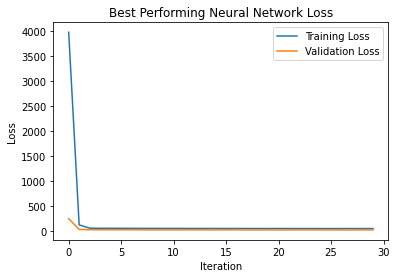

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.title('Best Performing Neural Network Loss')
plt.show()

# Ensemble Learning


---

By using a voting regressor that averages the predictions of the three original regression models, it should perform better than the best regressor (random forest).

In [ ]:
from sklearn.ensemble import VotingRegressor

linear_reg = LinearRegression()
decision_tree_reg = DecisionTreeRegressor(max_features = 8, random_state=42)
random_forest_reg = RandomForestRegressor(max_features = 18, n_estimators = 20, random_state=42)

voting_reg = VotingRegressor(
    estimators=[('lr', linear_reg), ('rf', random_forest_reg), ('dt', decision_tree_reg)])

In [ ]:
voting_reg.fit(schooldata_prepared, schooldata_labels)

VotingRegressor(estimators=[('lr', LinearRegression()),
                            ('rf',
                             RandomForestRegressor(max_features=18,
                                                   n_estimators=20,
                                                   random_state=42)),
                            ('dt',
                             DecisionTreeRegressor(max_features=8,
                                                   random_state=42))])

In [ ]:
voting_pred = voting_reg.predict(school_test_prep)

voting_mse = mean_squared_error(school_test_labels, voting_pred)
voting_rmse = np.sqrt(voting_mse)
print(voting_rmse)

3.810679638697147


This performs better than random forest! But maybe by having the random forest predictions weigh more, the voting regressor will end up with an even lower RMSE.

In [ ]:
linear_reg = LinearRegression()
decision_tree_reg = DecisionTreeRegressor(max_features = 8, random_state=42)
random_forest_reg = RandomForestRegressor(max_features = 18, n_estimators = 20, random_state=42)

voting_reg_weight = VotingRegressor(
    estimators=[('lr', linear_reg), ('rf', random_forest_reg), ('dt', decision_tree_reg)], 
    weights=[0.25, 0.5, 0.25])

In [ ]:
voting_reg_weight.fit(schooldata_prepared, schooldata_labels)

VotingRegressor(estimators=[('lr', LinearRegression()),
                            ('rf',
                             RandomForestRegressor(max_features=18,
                                                   n_estimators=20,
                                                   random_state=42)),
                            ('dt',
                             DecisionTreeRegressor(max_features=8,
                                                   random_state=42))],
                weights=[0.25, 0.5, 0.25])

In [ ]:
voting_weight_pred = voting_reg_weight.predict(school_test_prep)

voting_weight_mse = mean_squared_error(school_test_labels, voting_weight_pred)
voting_weight_rmse = np.sqrt(voting_weight_mse)
print(voting_weight_rmse)

3.7048572081176405


In [ ]:
linear_reg = LinearRegression()
decision_tree_reg = DecisionTreeRegressor(max_features = 8, random_state=42)
random_forest_reg = RandomForestRegressor(max_features = 18, n_estimators = 20, random_state=42)

voting_reg_weight = VotingRegressor(
    estimators=[('lr', linear_reg), ('rf', random_forest_reg), ('dt', decision_tree_reg)])

In [ ]:
vote_param_grid = [{'weights': [None, [0.25, 0.5, 0.25], [0, 0.7, 0.3], [0.3, 0.7, 0], [0.3, 0.5, 0.2], [0.2, 0.5, 0.3]]}]
vote_grid_search = GridSearchCV(voting_reg_weight, vote_param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
vote_grid_search.fit(schooldata_prepared, schooldata_labels)

GridSearchCV(cv=5,
             estimator=VotingRegressor(estimators=[('lr', LinearRegression()),
                                                   ('rf',
                                                    RandomForestRegressor(max_features=18,
                                                                          n_estimators=20,
                                                                          random_state=42)),
                                                   ('dt',
                                                    DecisionTreeRegressor(max_features=8,
                                                                          random_state=42))]),
             param_grid=[{'weights': [None, [0.25, 0.5, 0.25], [0, 0.7, 0.3],
                                      [0.3, 0.7, 0], [0.3, 0.5, 0.2],
                                      [0.2, 0.5, 0.3]]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [ ]:
vote_grid_search.best_estimator_

VotingRegressor(estimators=[('lr', LinearRegression()),
                            ('rf',
                             RandomForestRegressor(max_features=18,
                                                   n_estimators=20,
                                                   random_state=42)),
                            ('dt',
                             DecisionTreeRegressor(max_features=8,
                                                   random_state=42))],
                weights=[0, 0.7, 0.3])

In [ ]:
voting_weight_pred = vote_grid_search.best_estimator_.predict(school_test_prep)

In [ ]:
voting_weight_mse = mean_squared_error(school_test_labels, voting_weight_pred)
voting_weight_rmse = np.sqrt(voting_weight_mse)
print(voting_weight_rmse)

3.8173514387300287


# Analysis and Experimentation


Below is the best performing model. It is a voting regressor with a 50% weight assigned to random forest predictions, and 25% each assigned to the linear regressor and the decision tree models.

In [ ]:
linear_reg = LinearRegression()
decision_tree_reg = DecisionTreeRegressor(max_features = 8, random_state=42)
random_forest_reg = RandomForestRegressor(max_features = 18, n_estimators = 20, random_state=42)

voting_reg_weight = VotingRegressor(
    estimators=[('lr', linear_reg), ('rf', random_forest_reg), ('dt', decision_tree_reg)], 
    weights=[0.25, 0.5, 0.25])

In [ ]:
voting_reg_weight.fit(schooldata_prepared, schooldata_labels)

VotingRegressor(estimators=[('lr', LinearRegression()),
                            ('rf',
                             RandomForestRegressor(max_features=18,
                                                   n_estimators=20,
                                                   random_state=42)),
                            ('dt',
                             DecisionTreeRegressor(max_features=8,
                                                   random_state=42))],
                weights=[0.25, 0.5, 0.25])

In [ ]:
voting_weight_pred = voting_reg_weight.predict(school_test_prep)

voting_weight_mse = mean_squared_error(school_test_labels, voting_weight_pred)
voting_weight_rmse = np.sqrt(voting_weight_mse)
print(voting_weight_rmse)

3.7048572081176405


The feature with the highest importance score is free and reduced lunch rate (based on the random forest model). We are taking the first datapoint in the normalized testing data and seeing how the voting regressor's prediction changes when it is given a lower value (-1) and a higher value (1). This is when compared by the model's prediction before the datapoint was altered (94.28834055). From the code below, it seems that having a low f/r rate led to a higher predition (by about .02%). However, by having a high f/r rate, the prediction lowers (by about 4%)! 

In [ ]:
schooldata_sample = schooldata_prepared[:1].copy()
schooldata_sample_label = schooldata_labels[:1].copy()
schooldata_sample_pred = voting_reg_weight.predict(schooldata_sample)

print(schooldata_sample_label)
print(schooldata_sample_pred)

135    94.21
Name: 4 Year Graduation Rate, dtype: float64
[94.28834055]


In [ ]:
print(schooldata_sample)

[[-0.94411179 -0.08332247 -0.31059438 -0.11294795  0.75432322  3.22483053
   0.17054327 -0.13087699 -0.72835361  0.25039737  0.20848017  1.5838963
   0.79767673 -0.23487818 -0.33661891 -0.12268749  1.23310777  2.990771
  -0.83328704 -0.06363432  0.52895074 -0.01377499  1.23101009]]


In [ ]:
schooldata_sample[:1, 0] = -1

In [ ]:
print(schooldata_sample)

[[-1.         -0.08332247 -0.31059438 -0.11294795  0.75432322  3.22483053
   0.17054327 -0.13087699 -0.72835361  0.25039737  0.20848017  1.5838963
   0.79767673 -0.23487818 -0.33661891 -0.12268749  1.23310777  2.990771
  -0.83328704 -0.06363432  0.52895074 -0.01377499  1.23101009]]


In [ ]:
schooldata_sample_pred = voting_reg_weight.predict(schooldata_sample)

In [ ]:
print(schooldata_sample_label)
print(schooldata_sample_pred)

135    94.21
Name: 4 Year Graduation Rate, dtype: float64
[94.30988205]


In [ ]:
schooldata_sample[:1, 0] = 1

In [ ]:
schooldata_sample_pred = voting_reg_weight.predict(schooldata_sample)

In [ ]:
print(schooldata_sample_label)
print(schooldata_sample_pred)

135    94.21
Name: 4 Year Graduation Rate, dtype: float64
[90.88377173]


In [ ]:
schooldata_sample = schooldata_prepared[:1].copy() #getting first data point again

Another feature with a comparitavely high importance score is the percentage of students enrolled in at least one AP class. We are taking the first datapoint in the normalized testing data and seeing how the voting regressor's prediction changes when it is given a lower value (-1) and a higher value (1). These new predictions are compared to the model's prediction before the datapoint was altered (94.28834055). From the code below, it seems that having a low AP enrollment rate led to a lower predition. However, having a high AP enrollment rate also led to a lower prediction. Both predictions were around 1% lower than the first prediction. 

In [ ]:
schooldata_sample_pred = voting_reg_weight.predict(schooldata_sample)

In [ ]:
print(schooldata_sample_label)
print(schooldata_sample_pred)

135    94.21
Name: 4 Year Graduation Rate, dtype: float64
[94.28834055]


In [ ]:
schooldata_sample[:1, 18] = 1

In [ ]:
schooldata_sample_pred = voting_reg_weight.predict(schooldata_sample)

In [ ]:
print(schooldata_sample_label)
print(schooldata_sample_pred)

135    94.21
Name: 4 Year Graduation Rate, dtype: float64
[93.09667899]


In [ ]:
schooldata_sample[:1, 18] = -1

In [ ]:
schooldata_sample_pred = voting_reg_weight.predict(schooldata_sample)

In [ ]:
print(schooldata_sample_label)
print(schooldata_sample_pred)

135    94.21
Name: 4 Year Graduation Rate, dtype: float64
[93.56239797]


In [ ]:
xt = school_test_prep[:62]

pred1 = lin_reg.predict(xt)
pred2 = tree_reg.predict(xt)
pred3 = forest_reg.predict(xt)
pred4 = voting_reg_weight.predict(xt)

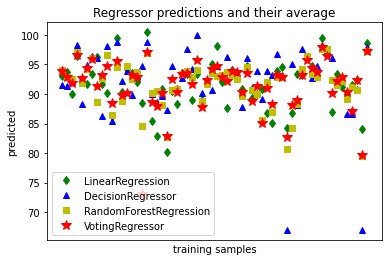

In [ ]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(pred1, "gd", label="LinearRegression")
plt.plot(pred2, "b^", label="DecisionRegressor")
plt.plot(pred3, "ys", label="RandomForestRegression")
plt.plot(pred4, "r*", ms=10, label="VotingRegressor")



plt.tick_params(axis="x", which="both", bottom=False, top=False, labelbottom=False)
plt.ylabel("predicted")
plt.xlabel("training samples")
plt.legend(loc="best")
plt.title("Regressor predictions and their average")

plt.show()

# References

---

*   https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html - Help with merging dataframes.
*   https://colab.research.google.com/drive/10VjV1l6ZWsmmwc34hffV62_lSRfx5neQ - Help with feature engineering, hyperparamter tuning, training regressor models.
*   https://colab.research.google.com/drive/1x5biI3dP5YvvDEI0wapJcSgQNnATDzNe - Examples of neural nets used for regression.
*   https://colab.research.google.com/drive/1fhUB6bKPe43UfYvEQ3b98KwLWo5qEPlc - Example voting regressors.